# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

(Beton çökme testi, taze betonun sertleşmeden önceki kıvamını ölçer. Taze yapılmış betonun işlenebilirliğini ve dolayısıyla betonun akma kolaylığını kontrol etmek için yapılır. Ayrıca, yanlış karıştırılmış bir partinin göstergesi olarak da kullanılabilir.

Veri setimiz çeşitli çimento özelliklerinden ve cm cinsinden elde edilen çökme testi metriklerinden oluşmaktadır. Daha sonra prizlenen beton 28 gün sonra basınç dayanımı açısından test edilir.)

Input variables (9):

(component kg in one M^3 concrete)(7):(1 metreküp betondaki bileşenler)
* Cement (Çimento)
* Slag (Cüruf çimentosu, uçucu külden daha homojen bir üründür. Sonuç olarak, cüruf çimento ile yapılan beton, genellikle uçucu kül ile yapılan betondan daha düzgün özelliklere sahip olacaktır.)
* Fly ash
* Water
* SP (Superplasticizers - Easily Soluble In Water)(Süperakışkanlaştırıcılar, modern betonun temel bileşenleri olup, çevreye etkisi azaltılmış, oldukça dayanıklı yapıların üretilmesine olanak tanır. Çalışma mekanizmaları moleküler yapılarına ve kendileri ile çimento parçacıklarının yüzeyi arasında meydana gelen fiziksel-kimyasal etkileşimlere dayanır.)
* Coarse Aggr.(İri agregalar, kum, çakıl veya kırma taş gibi düzensiz ve taneli malzemeleri ifade eder ve beton yapımında kullanılır. Çoğu durumda, Kaba doğal olarak oluşur ve taş ocaklarının patlatılmasıyla veya elle veya kırıcılarla ezilmesiyle elde edilebilir.)
* Fine Aggr. (İnce agregalar, esas olarak, madencilik süreciyle araziden kazanılan herhangi bir doğal kum parçacığıdır. İnce agregalar, doğal kum veya ¼” veya daha küçük herhangi bir kırma taş parçacıklarından oluşur. Bu ürün, bu belirli agreganın boyutuna veya derecelenmesine atıfta bulunduğu için genellikle 1/4'” eksi olarak adlandırılır.)

(Measurements)(2)(Çökme testi metrikleri)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*)

# Importing dependencies

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.max_columns",100)
# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

# Loading data

In [222]:
df = pd.read_csv("cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [224]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000,229.894,78.877,137.000,152.000,248.000,303.900,374.000
Slag,103.000,77.974,60.461,0.000,0.050,100.000,125.000,193.000
Fly ash,103.000,149.015,85.418,0.000,115.500,164.000,235.950,260.000
Water,103.000,197.168,20.208,160.000,180.000,196.000,209.500,240.000
SP,103.000,8.540,2.808,4.400,6.000,8.000,10.000,19.000
Coarse Aggr.,103.000,883.979,88.391,708.000,819.500,879.000,952.800,1049.900
Fine Aggr.,103.000,739.605,63.342,640.600,684.500,742.700,788.000,902.000
SLUMP(cm),103.000,18.049,8.751,0.000,14.500,21.500,24.000,29.000
FLOW(cm),103.000,49.611,17.569,20.000,38.500,54.000,63.750,78.000
Compressive Strength (28-day)(Mpa),103.000,36.039,7.837,17.190,30.900,35.520,41.205,58.530


When looking at the variables, the ratios between mean and std are normal, so no outlier values are noticeable in the dataset.

In [225]:
# Let's examine the correlation between the target column and other variables:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


In [226]:
df.corr()['Compressive Strength (28-day)(Mpa)'].sort_values(ascending=False)

Compressive Strength (28-day)(Mpa)    1.000
Cement                                0.446
Fly ash                               0.444
SP                                   -0.038
FLOW(cm)                             -0.124
Fine Aggr.                           -0.155
Coarse Aggr.                         -0.161
SLUMP(cm)                            -0.223
Water                                -0.254
Slag                                 -0.332
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [227]:
df.corr()['Compressive Strength (28-day)(Mpa)'].loc["Cement"]

0.4456561425636215

In [228]:
df.corr()['Compressive Strength (28-day)(Mpa)'].index.get_loc("Cement")

0

In [229]:
pos = []
neg=[]
for i in df.corr()['Compressive Strength (28-day)(Mpa)'].index:
    if df.corr()['Compressive Strength (28-day)(Mpa)'].loc[i] > 0:
        pos.append(i)
    else:
        neg.append(i)
print(f"Columns positively correlated with the target variable : {pos}", end = "\n\n")        
print(f"Columns negatively correlated with the target variable : {neg}")  

Columns positively correlated with the target variable : ['Cement', 'Fly ash', 'Compressive Strength (28-day)(Mpa)']

Columns negatively correlated with the target variable : ['Slag', 'Water', 'SP', 'Coarse Aggr.', 'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)']


There is no variable with high correlation with the target variable. Each is less than 0.5.

# EDA and Graphical analysis

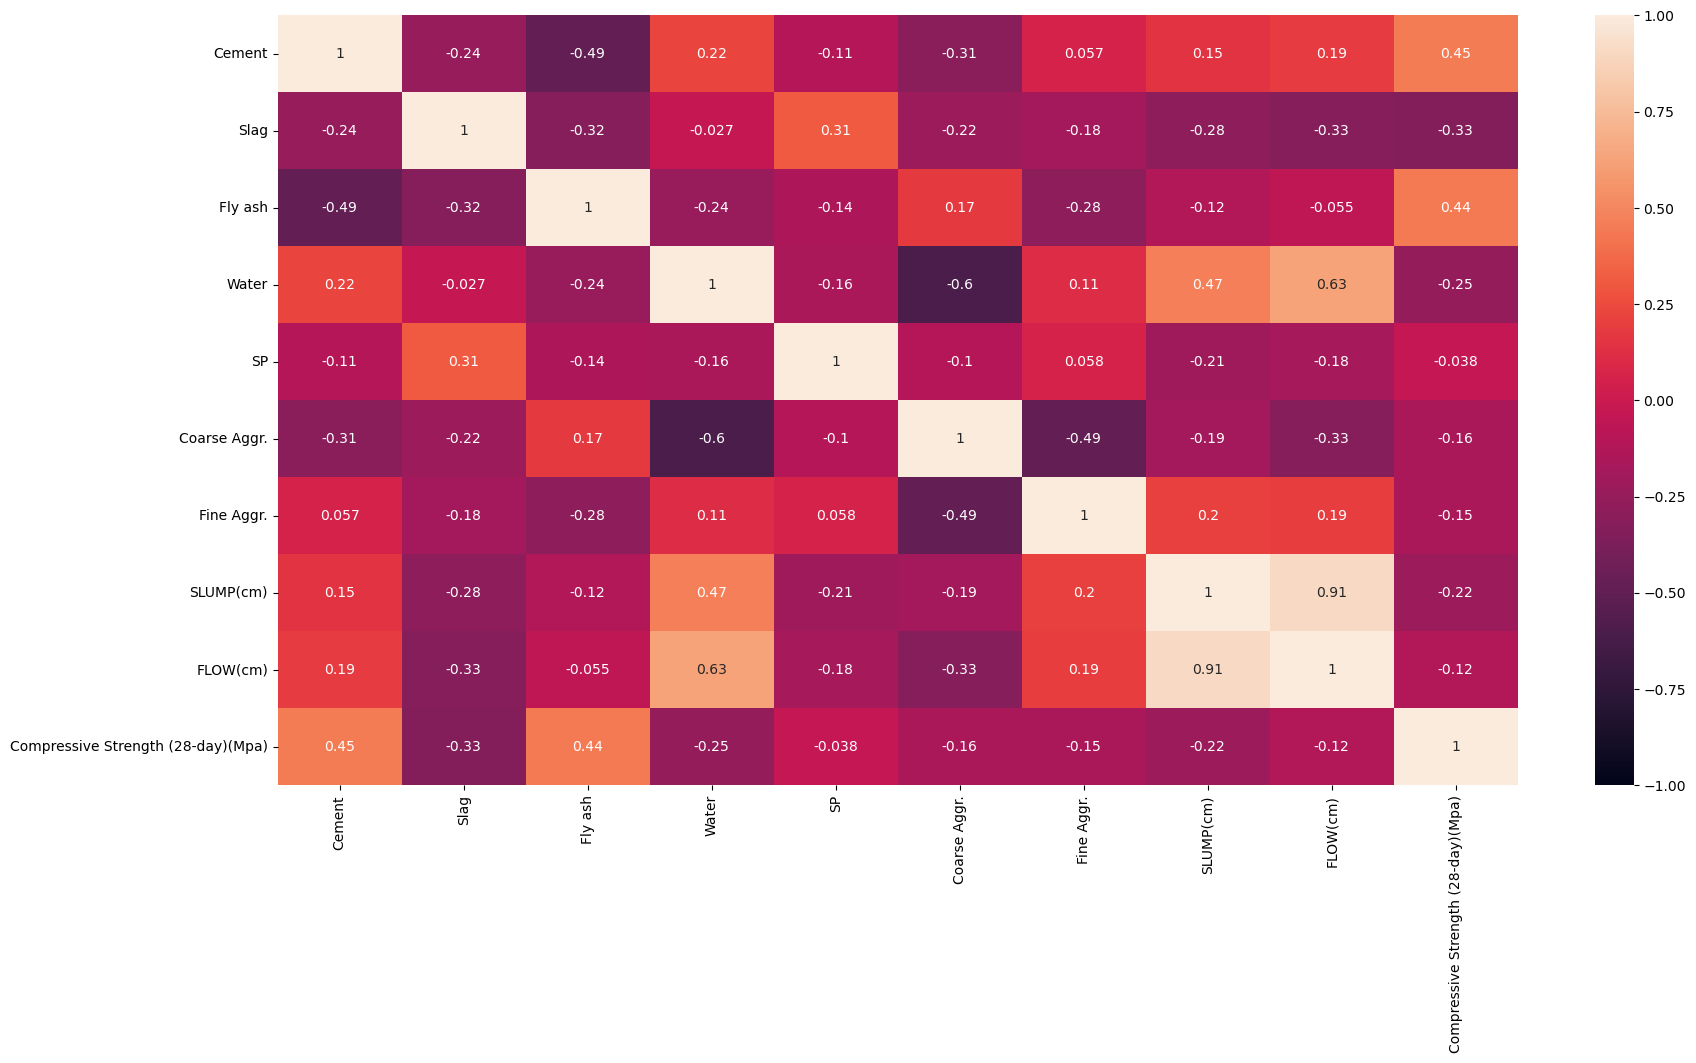

In [230]:
# Let's look at the correlation of each feature with each other
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)
plt.show()

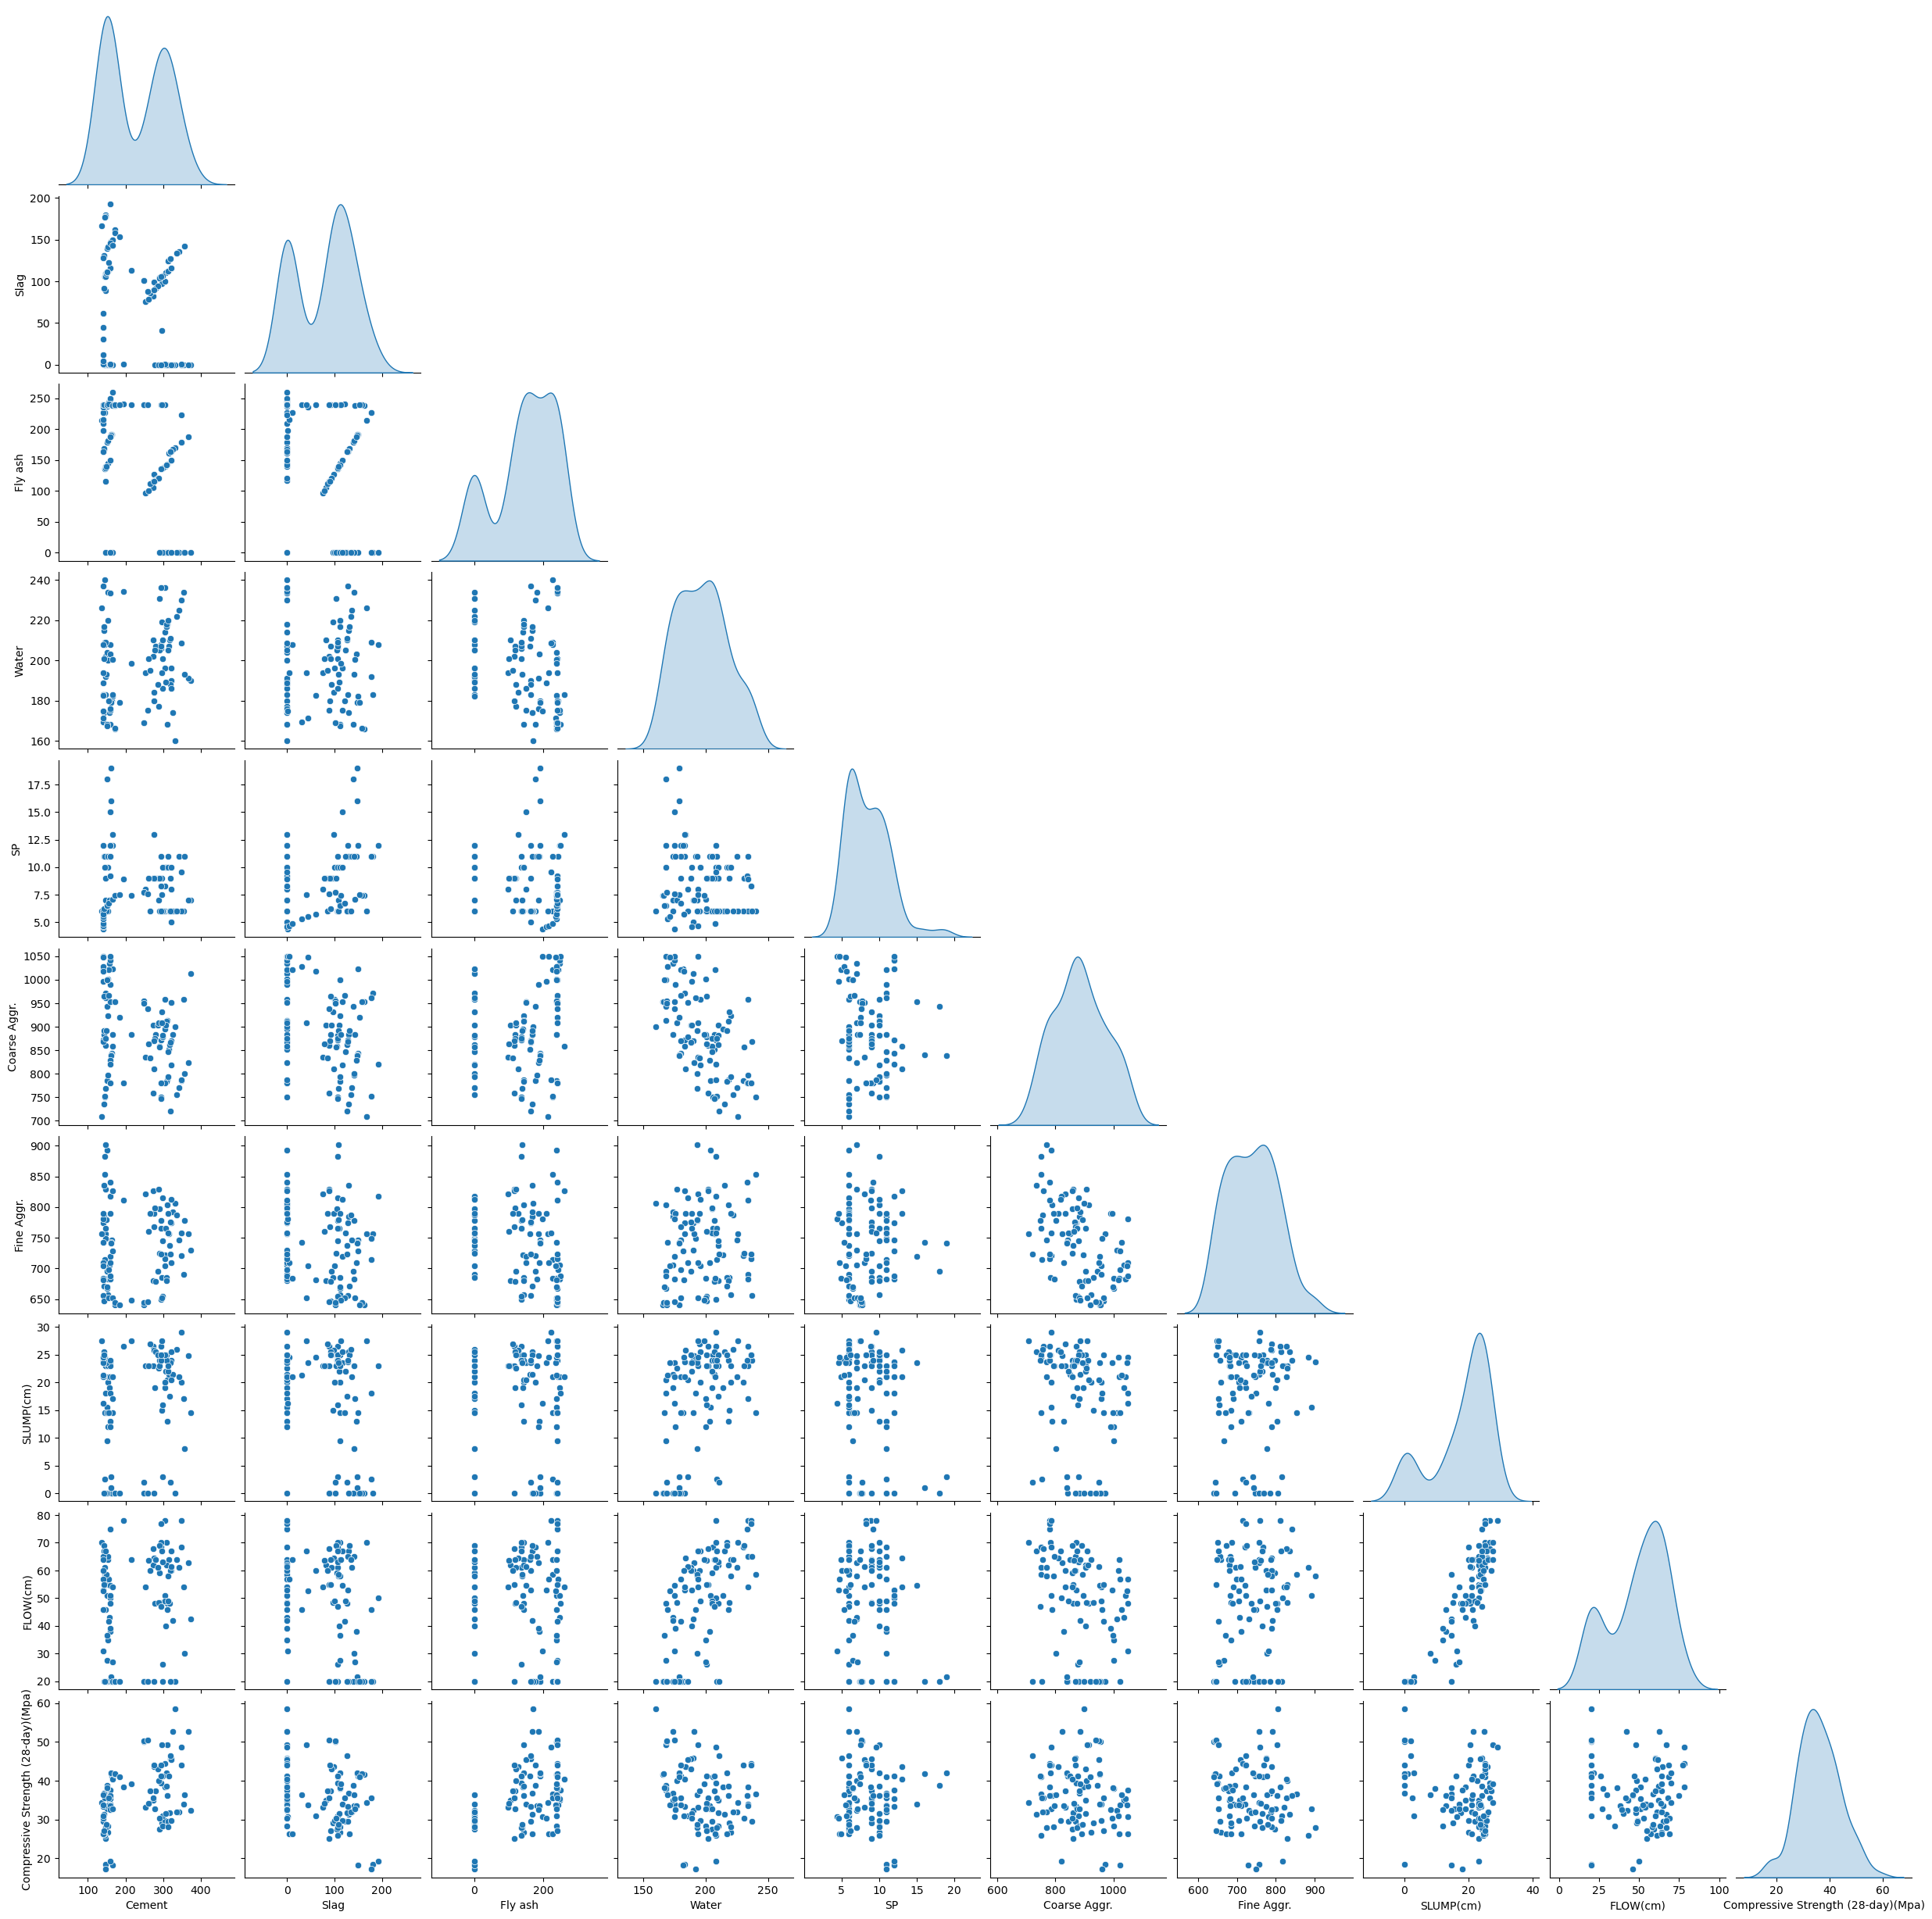

In [231]:
# Let's examine the graphs of the relationships of the pairs in the dataset with pairplot. 
# Since all columns are numeric, every graph except itself will be a scatter plot.
sns.pairplot(data=df, corner=True, diag_kind="kde")
plt.show()

It is clear that there is a high correlation between slump and flow.

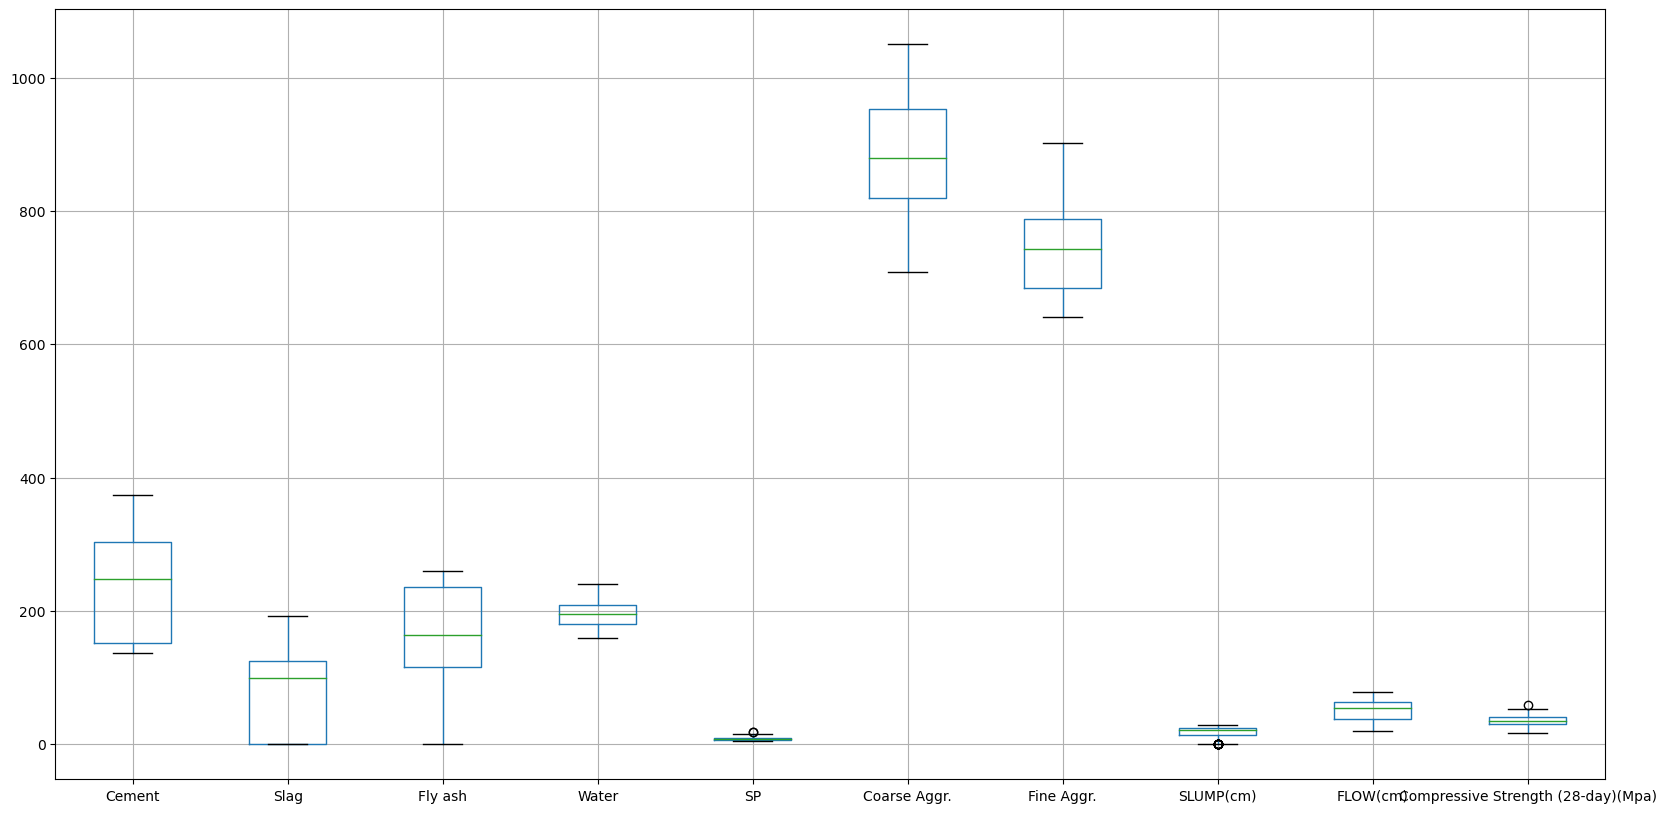

In [232]:
plt.figure(figsize =(20,10))
df.boxplot()
plt.show()

When the boxplot is examined, we see that there is no outlier value. We also see how the distribution of the features in the data is and we decide that scaling should be done.

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [233]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing
* Split the data into training and testing sets

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [236]:
dict1 = {"X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test}

for key, value in dict1.items():
    print(f"{key:>20}\n\n {value}")  # {i:< 20} align 
    print(value.shape[0], "rows")
    print(30*"*")

             X_train

      Cement    Slag  Fly ash   Water     SP  Coarse Aggr.  Fine Aggr.  \
53  309.000   0.000  142.000 218.000 10.000       912.000     680.000   
22  148.000 180.000    0.000 183.000 11.000       972.000     757.000   
68  320.000 127.000  164.000 211.000  6.000       721.000     723.000   
44  298.000 107.000    0.000 186.000  6.000       879.000     815.000   
98  248.300 101.000  239.100 168.900  7.700       954.200     640.600   
..      ...     ...      ...     ...    ...           ...         ...   
71  313.000 112.000    0.000 220.000 10.000       794.000     789.000   
14  374.000   0.000    0.000 190.000  7.000      1013.000     730.000   
92  303.800   0.200  239.800 236.400  8.300       780.100     715.300   
51  342.000 136.000    0.000 225.000 11.000       770.000     747.000   
102 348.700   0.100  223.100 208.500  9.600       786.200     758.100   

     SLUMP(cm)  FLOW(cm)  
53      24.000    62.000  
22       0.000    20.000  
68       2.000    2

In [237]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (82, 9)
Train target shape   :  (82,)
Test features shape  :  (21, 9)
Test target shape    :  (21,)


## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [238]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
scaler = StandardScaler()

In [239]:
scaler.fit(X_train)  # Apply just for X_tarin not for X_test (Kalıp çıkarma)

StandardScaler()

In [240]:
X_train_scaled = scaler.transform(X_train) # Apply transform according to fit
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [241]:
X_test_scaled = scaler.transform(X_test)  # only transfor test data
X_test_scaled

array([[ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
        -0.20967429,  0.56267018,  0.70678525,  0.65191812],
       [-0.81306726, -1.29720985,  1.30473577, -0.65655824,  1.53038037,
        -0.33492343,  1.41509971,  0.37338319,  0.3154619 ],
       [ 0.87081264,  0.45936384, -1.64936204,  0.66419403,  0.49979299,
        -0.08442514,  0.09624647,  0.81791927,  0.82014623],
       [ 0.71888363,  0.24594834, -0.27457037, -0.41197449,  0.15626386,
         0.17745943, -0.69184876,  0.81791927,  0.70799416],
       [-0.88903177,  1.09961032,  0.48667792,  0.32177677,  0.84332212,
        -0.676512  , -0.46667869, -0.51568895, -0.58175469],
       [-1.07894304,  1.6085242 ,  0.92979259,  0.61527728,  0.84332212,
        -1.553256  , -0.38626081, -1.68259614, -1.59112335],
       [-0.94727123,  0.70725415,  1.07749748, -0.80820017, -0.63385314,
         0.89251817, -1.39148432, -0.34898792, -0.38548856],
       [ 1.11136691,  0.77127879, -1.64936204,  0.66419403, -0

In [242]:
# if you don't use pipeline, you can use scaler directly
scaler.fit(X_train)  # In this level, It is learned std and mean 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)
# Transform on test data with train values so that there is no data leakage

If there are dummy columns, minmax, if there are outliers, robust scaling is usually done. We do purposeful scaling for each data.

Lets check std = 1 and mean = 0, this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.

In [243]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round() #Applying aggregation across all the columns, mean and std will be found for each column in the dataframe

,0,1,2,3,4,5,6,7,8
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [244]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## Pipeline

##  Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [245]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [246]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [247]:
y_pred = lm.predict(X_test_scaled) # predict on test data
y_train_pred = lm.predict(X_train_scaled) # predict on train data

## Linear Regression with Pipeline

In [248]:
from sklearn.pipeline import Pipeline # pipeline is used to combine scaler and model

In [249]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # will be used in pipeline later

In [250]:
pipe_lm = Pipeline([("scaler", scaler), ("lm", lm)]) # pipeline is used to combine scaler and model

In [251]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [252]:
y_pred = pipe_lm.predict(X_test) # predict on test data
y_train_pred = pipe_lm.predict(X_train) # predict on train data
# We compare the two to determine whether the model generalizes.

### Interpret the model
* Interpret the model by looking at the coefficients

In [253]:
lm.coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [254]:
lm.intercept_

35.84719512195121

In [255]:
def coefficients(model):
    coefficients = pd.DataFrame(model.coef_, index = X.columns, columns=['Coefficient'])
    return coefficients

In [256]:
coefficients(lm)

,Coefficient
Cement,4.280
Slag,-2.223
Fly ash,3.932
Water,-4.771
SP,0.121
Coarse Aggr.,-5.277
Fine Aggr.,-2.611
SLUMP(cm),-2.188
FLOW(cm),1.466


In [257]:
def model_equation(model):
    equation = ""
    counter = 1
    for i in zip(coefficients(model).Coefficient.values, coefficients(model).index):
            equation += str(i[0]) +" * "+ str(i[1])
            if counter < len(coefficients(model).Coefficient.values):
                equation += " + "
                counter += 1
    print(equation + f" + {model.intercept_}")


In [258]:
model_equation(lm)

4.280151773484633 * Cement + -2.222879540055529 * Slag + 3.9320197965943997 * Fly ash + -4.770839233751949 * Water + 0.1210996594829915 * SP + -5.277291216191513 * Coarse Aggr. + -2.6113134202738886 * Fine Aggr. + -2.188378043941532 * SLUMP(cm) + 1.4657062132485392 * FLOW(cm) + 35.84719512195121


### 1.2 Model Evaluation
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [259]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [260]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # train and test scores
ls

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [261]:
target_mean = df["Compressive Strength (28-day)(Mpa)"].mean()

In [262]:
per_mae = ls.loc["mae"] / target_mean
per_rmse = ls.loc["rmse"] / target_mean
print(per_mae)
print(per_rmse)

linear_train   0.054
linear_test    0.048
Name: mae, dtype: float64
linear_train   0.067
linear_test    0.059
Name: rmse, dtype: float64


According to our model, independent variables explain the dependent variable at a rate of 91%. There is a 9% that depends on different factors that our model cannot explain. Therefore, the success rate of the model is 91%. According to the MAE and RMSE metrics, the average error is 1.740 and 2.111, corresponding to 0.048% and 0.059%, which shows that the model is suitable for our data.

## Model validation

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


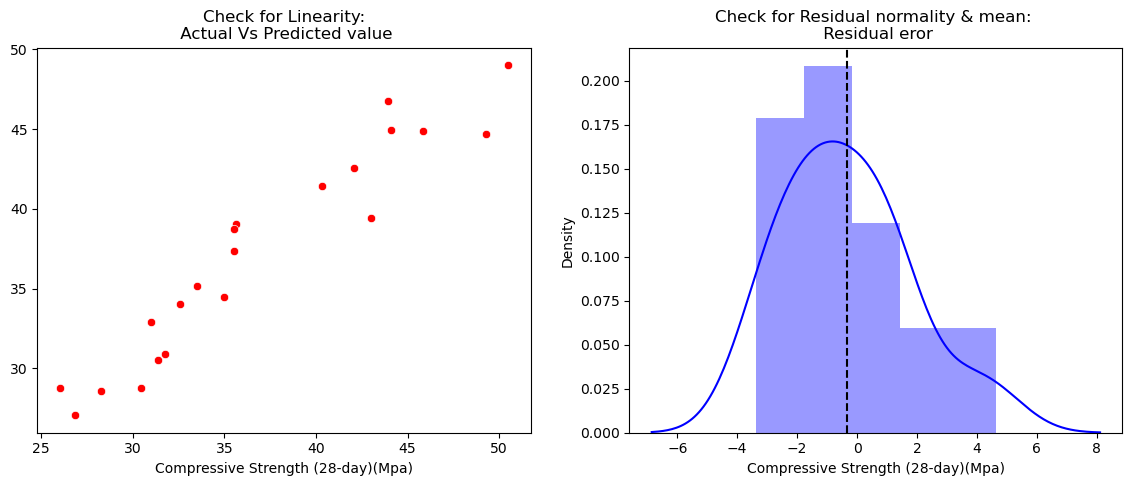

In [263]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');



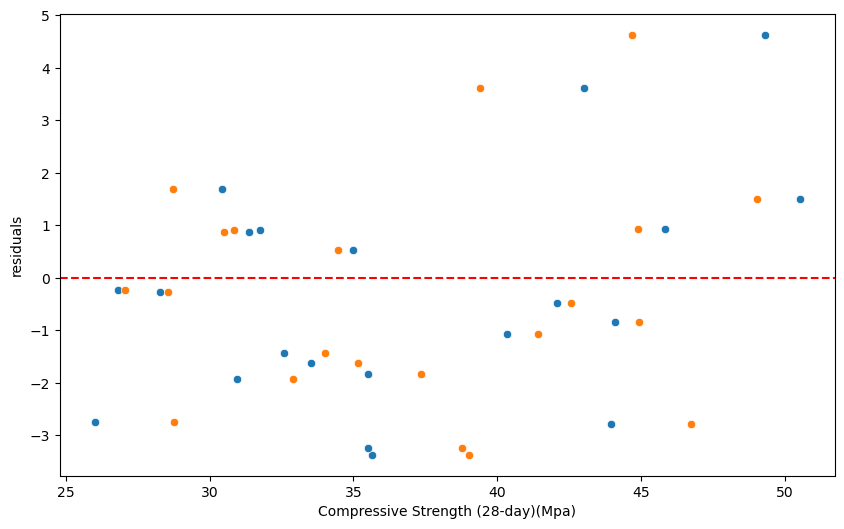

In [264]:
#Check for Homoscedasticity
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = y_test-y_pred) #-residuals
sns.scatterplot(x = y_pred, y = y_test-y_pred)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

In [265]:
from scipy.stats import skew
skew(y_test-y_pred)  # Normal dağılıma yakın değer (-0.5, 0.5) aralığı uygun bir aralıktır.

0.6026499074920305

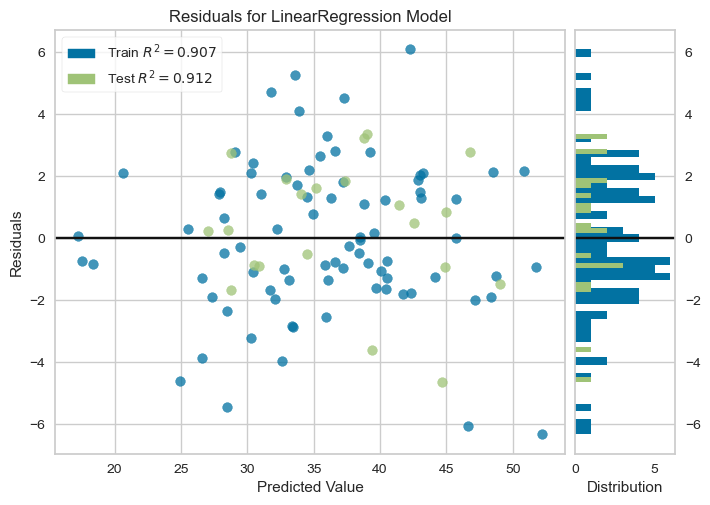

In [266]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
model = LinearRegression()  # modeli tanımla
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

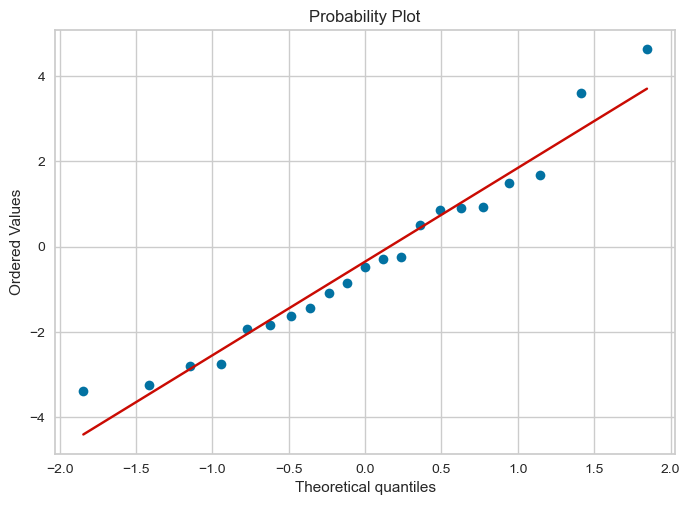

In [267]:
stats.probplot( y_test-y_pred, dist ="norm", plot =plt);

Linear Regression modeli veriye uygundur. 

Şimdi oluşturduğumuz modelin ne kadar kararlı olduğunu görmek için cross-validaion yapalım:Aldığımız tek seferlik puanların tutarlı olup olmadığını kontrol etmek için çapraz doğrulama yapıyoruz çapraz doğrulama sadece train setine uygulanıyor.

## Cross Validate

In [268]:
from sklearn.model_selection import cross_validate, cross_val_score

In [269]:
model = LinearRegression()
score = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv = 5, 
                        return_train_score=True)
df_score =  pd.DataFrame.from_dict(scores, orient='columns')
display(df_score)
df_score.mean()[2:]

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002,0.001,0.831,-3.127,-13.577,-3.685
2,0.001,0.002,0.496,-3.395,-18.497,-4.301
3,0.001,0.001,0.678,-2.371,-8.940,-2.990
4,0.001,0.001,0.677,-4.408,-35.451,-5.954
5,0.002,0.001,0.730,-3.315,-15.260,-3.906


test_r2                              0.682
test_neg_mean_absolute_error        -3.323
test_neg_mean_squared_error        -18.345
test_neg_root_mean_squared_error    -4.167
dtype: float64

In [270]:
ls

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [271]:
print("train RMSE:", ls.loc["rmse"][0]/df["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", -scores.iloc[:, 2:].mean().loc["test_neg_root_mean_squared_error"]/df["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725258043274442
CV RMSE: 0.11563131511579143


When we evaluate it through cross_validation, the success rate of the model is 84%. In addition, the error in the estimation is 0.75% according to cv rmse.

# Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)(Ridge_Regression)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them. Using pipeline.


In [272]:
from sklearn.linear_model import Ridge

In [273]:
ridge_model = Ridge(alpha=1, random_state=42) 
# alpha is a hyperparameter and its default is 1. 

In [274]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [275]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [276]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [277]:
pd.concat([ls, rs], axis=1) 

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907,0.912,0.906,0.911
mae,1.936,1.740,1.938,1.732
mse,5.874,4.454,5.922,4.493
rmse,2.424,2.111,2.434,2.120


### Choosing best alpha value with Cross-Validation

In [278]:
from sklearn.linear_model import RidgeCV

In [279]:
alpha_space = np.linspace(0.1, 1, 100)  
# alpha is between 0 and 1. So we create a random array.
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [280]:
ridge_cv_model = RidgeCV(alphas=alpha_space, 
                         cv = 10, 
                         scoring= "neg_root_mean_squared_error") 
# will be used in pipeline later

In [281]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [282]:
ridge_cv_model.alpha_ # best alpha

0.9181818181818181

In [283]:
#rmse for ridge with CV
ridge_cv_model.best_score_

-2.696393065100248

In [284]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [285]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.917,4.485
rmse,2.432,2.118


In [286]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907,0.912,0.906,0.911,0.906,0.911
mae,1.936,1.740,1.938,1.732,1.938,1.732
mse,5.874,4.454,5.922,4.493,5.917,4.485
rmse,2.424,2.111,2.434,2.120,2.432,2.118


Linear regression, Ridge regression for alpha =1 and Ridge Regression models for alpha=0.91 did not differ much in terms of success (score) on this data.

Now, let's examine the coefficients of the models made up of these three algorithms:

In [287]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, 
                      index = X.columns,
                      columns=["ridge_cv_coef_0.91"])

In [288]:
rm_df = pd.DataFrame(ridge_model.coef_, 
                     index = X.columns, 
                     columns=["ridge_coef_1"])

In [289]:
lm_df =  pd.DataFrame(lm.coef_,
                      index = X.columns, 
                      columns=["lm_coef"])

In [290]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1) 
# predictions made the no-effects close to zero
# feature with large coefficients can be called important feature and features with small
# --- coefficients can be called insignificant
# ridge with important and unimportant grouping

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91
Cement,4.280,5.011,5.005
Slag,-2.223,-1.378,-1.389
Fly ash,3.932,4.806,4.797
Water,-4.771,-3.906,-3.932
SP,0.121,0.261,0.258
Coarse Aggr.,-5.277,-4.066,-4.092
Fine Aggr.,-2.611,-1.747,-1.763
SLUMP(cm),-2.188,-1.955,-1.970
FLOW(cm),1.466,1.133,1.155


When we look at the coefficients, we see the change in the coefficients of the Ridge regression. That is, which feature has greater impact on the target column has emerged more clearly.
> We know that there is a multicolinearty problem between the slump and flow columns. It is clear from the coefficients that slump suppresses the flow in linear regression. However, ridge regression solved the multicolinearity problem by converging the coefficients of slump and flow.

## Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [291]:
from sklearn.linear_model import Lasso, LassoCV

In [292]:
lasso_model = Lasso(alpha = 1, random_state=42)  # model is called as vanilla for defaults

In [293]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [294]:
y_pred = lasso_model.predict(X_test_scaled)

In [295]:
y_train_pred = lasso_model.predict(X_train_scaled)

In [296]:
lasso = train_val(y_train, y_train_pred, y_test, y_pred,"lasso")
lasso
# compared to the ridge model, it seems underfitting,
# the scores can be improved by fine tuning

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


Although the train scores are usually high, sometimes the test scores can be higher.

> big alpha = big error = big regularization

In [297]:
pd.concat([ls, rs, rcs,lasso], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168


For alpha = 1, Lasso model added more bias so scores are falled.

In [298]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)
scores = pd.DataFrame(scores, index = range(1, 6))
display(scores)
scores.iloc[:,2:].mean()

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.002,0.002,0.831,-3.127,-13.577,-3.685
2,0.003,0.002,0.496,-3.395,-18.497,-4.301
3,0.002,0.001,0.678,-2.371,-8.940,-2.990
4,0.001,0.001,0.677,-4.408,-35.451,-5.954
5,0.001,0.001,0.730,-3.315,-15.260,-3.906


test_r2                              0.682
test_neg_mean_absolute_error        -3.323
test_neg_mean_squared_error        -18.345
test_neg_root_mean_squared_error    -4.167
dtype: float64

In [299]:
train_val(y_train, y_train_pred, y_test, y_pred,"lasso")

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


Lasso Model is underfitting the training data when the model performs poorly on the training data. This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y).

In [300]:
lss_df =  pd.DataFrame(lasso_model.coef_,
                      index = X.columns, 
                      columns=["lasso_coef"])

In [301]:
pd.concat([lm_df,rm_df, rcm_df,lss_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef
Cement,4.280,5.011,5.005,4.821
Slag,-2.223,-1.378,-1.389,-0.000
Fly ash,3.932,4.806,4.797,4.880
Water,-4.771,-3.906,-3.932,-0.820
SP,0.121,0.261,0.258,0.000
Coarse Aggr.,-5.277,-4.066,-4.092,-0.351
Fine Aggr.,-2.611,-1.747,-1.763,-0.000
SLUMP(cm),-2.188,-1.955,-1.970,-0.711
FLOW(cm),1.466,1.133,1.155,-0.000


> Since there is a multicollinearity (high correlation) between Slump and Flow, Lasso resets one of them. In summary, linear regression suppresses one, ridge coefficients converge, and Lasso zeroes one.

### Choosing best alpha value with Cross-Validation

In [302]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=42)
# If max_iter is less, error rises.

In [303]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        cv=10, max_iter=100000, random_state=42)

In [304]:
lasso_cv_model.alpha_

0.1

In [305]:
# Lasso(alpha =0.1)
y_pred = lasso_cv_model.predict(X_test_scaled)   
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [306]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900,0.908
mae,1.967,1.767
mse,6.295,4.658
rmse,2.509,2.158


In [308]:
pd.concat([ls,rs, rcs, lasso, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158


rmse nin düşme sebebi alpha nın düşük alınması. Yani en uygunla düzenleme yapıldı. train ve test in olabildiğince birbirine en yakın olanı tercih etmeliyiz. Bu skoru 7 feature la aldık. 9 featurla %90 luk skora 7 feature la %90 luk modeli final model olarak seçmek daha uygundur.

In [309]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.1"],index=X.columns)

In [312]:
pd.concat([lm_df, rm_df, rcm_df, lss_df, lcm_df], axis = 1) # (with 7 features ) test_r2 = 0.90

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef,lasso_cv_coef_0.1
Cement,4.280,5.011,5.005,4.821,6.361
Slag,-2.223,-1.378,-1.389,-0.000,0.000
Fly ash,3.932,4.806,4.797,4.880,6.449
Water,-4.771,-3.906,-3.932,-0.820,-2.386
SP,0.121,0.261,0.258,0.000,0.467
Coarse Aggr.,-5.277,-4.066,-4.092,-0.351,-2.090
Fine Aggr.,-2.611,-1.747,-1.763,-0.000,-0.228
SLUMP(cm),-2.188,-1.955,-1.970,-0.711,-1.082
FLOW(cm),1.466,1.133,1.155,-0.000,0.000


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [316]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [317]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42) 
# l1_ratio is used to control the amount of L1 and L2 regularization
# For l1_ratio = 1`` it is an L1 penalty.  For ``0 < l1_ratio < 1``, 
# the penalty is a combination of L1 and L2.

In [318]:
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [320]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [322]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es
# for defaults model is underfitting

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [323]:
pd.concat([ls,rs, rcs, lasso, lcs,es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908,0.637,0.635
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767,3.803,3.556
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658,22.982,18.466
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158,4.794,4.297


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [324]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)

scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [325]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.570,-4.891,-34.545,-5.878
2,0.460,-3.334,-19.789,-4.449
3,0.542,-3.014,-12.725,-3.567
4,0.538,-5.548,-50.745,-7.124
5,0.605,-4.223,-22.316,-4.724


In [326]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.543
test_neg_mean_absolute_error        -4.202
test_neg_mean_squared_error        -28.024
test_neg_root_mean_squared_error    -5.148
dtype: float64

In [327]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [329]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, L1:0.5)"], index=X.columns)

In [331]:
pd.concat([lm_df, rm_df, rcm_df, lss_df, lcm_df,em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef,lasso_cv_coef_0.1,"elastic_coef_(alp:1, L1:0.5)"
Cement,4.280,5.011,5.005,4.821,6.361,2.617
Slag,-2.223,-1.378,-1.389,-0.000,0.000,-0.730
Fly ash,3.932,4.806,4.797,4.880,6.449,2.671
Water,-4.771,-3.906,-3.932,-0.820,-2.386,-1.202
SP,0.121,0.261,0.258,0.000,0.467,0.000
Coarse Aggr.,-5.277,-4.066,-4.092,-0.351,-2.090,-1.164
Fine Aggr.,-2.611,-1.747,-1.763,-0.000,-0.228,-0.322
SLUMP(cm),-2.188,-1.955,-1.970,-0.711,-1.082,-0.826
FLOW(cm),1.466,1.133,1.155,-0.000,0.000,-0.000


## Grid Search for ElasticNet


In [351]:
from sklearn.model_selection import GridSearchCV

In [352]:
elastic_model = ElasticNet(max_iter=100000, random_state=42) 

In [353]:
param_grid = {"alpha":alpha_space,
            "l1_ratio":[0.1, 0.5, 0.7,0.9, 0.95, 1]}

In [354]:
grid_model = GridSearchCV(estimator = elastic_model, 
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =10, 
                          verbose =2)

In [355]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0

[CV] END ...............alpha=0.1090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.1090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.1090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.1090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.1090909090909091, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.1181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=0.14545454545454545, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.14545454545454545, l1_ratio=0.9; total time=   0.0s
[CV] END ...........alpha=0.14545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.

[CV] END ............alpha=0.16363636363636364, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.16363636363636364, l1_ratio=0.9; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.16363636363636364, l1_ratio=0.95; total time=   0.0s
[CV] END ..............alpha

[CV] END ...........alpha=0.18181818181818182, l1_ratio=0.95; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.18181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ............alpha=0.19090909090909092, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0

[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.2, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.2090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.2090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...........alpha=0.23636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.23636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=0.2545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2545454545454545, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.2545454545454545, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2545454545454545, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2545454545454545, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2545454545454545, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.28181818181818186, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.2909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.2909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.2909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ............alpha=0.3090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.3090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.3090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.3090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.3090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.3090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.3090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.3090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.3090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.3090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.3090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.3090909090909091, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.34545454545454546, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.36363636363636365, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.36363636363636365, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0.38181818181818183, l1_ratio=0.7; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............................alpha=0.4, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.4, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

[CV] END ..............alpha=0.40909090909090906, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.40909090909090906, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4181818181818182, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.4363636363636364, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END ...........alpha=0.44545454545454544, l1_ratio=0.95; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.44545454545454544, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.4545454545454546, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=0.4636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.47272727272727266, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.1; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0.49090909090909085, l1_ratio=0.5; total time=   0.0s
[CV] END ............alpha=0

[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............................alpha=0.5, l1_ratio=1; total time=   0.0s
[CV] END ..............alpha=0.509090909090909, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha=0.509090909090909, l1_ratio=0.1; total time=   0.0s
[CV] END ..............alpha

[CV] END ............alpha=0.5181818181818182, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5181818181818182, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.5272727272727272, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=0.5363636363636364, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5363636363636364, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5363636363636364, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.5454545454545454, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.5727272727272728, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.5727272727272728, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.5909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.5909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.5909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=0.6181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.6181818181818182, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ...............alpha=0.6454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6454545454545454, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6454545454545454, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.6545454545454545, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=0.6636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6636363636363636, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.6636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6636363636363636, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ............alpha=0.6818181818181818, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6818181818181818, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6818181818181818, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.6818181818181818, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.6818181818181818, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6818181818181818, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6818181818181818, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6818181818181818, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6818181818181818, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6818181818181818, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6818181818181818, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.6818181818181818, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ............................alpha=0.7, l1_ratio=0.9; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...........................alpha=0.7, l1_ratio=0.95; total time=   0.0s
[CV] END ...................

[CV] END .............alpha=0.7181818181818181, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7181818181818181, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.7363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7363636363636363, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.7363636363636363, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7363636363636363, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7363636363636363, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7363636363636363, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7363636363636363, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7363636363636363, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7363636363636363, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0

[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.7727272727272727, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.7727272727272727, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7727272727272727, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7727272727272727, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7727272727272727, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0

[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.7909090909090909, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.7909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.7909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.7909090909090909, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END .............alpha=0.8090909090909091, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8090909090909091, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8090909090909091, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8090909090909091, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.8090909090909091, l1_ratio=0.9; total time=   0.0s
[CV] END ............alpha=0.8090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8090909090909091, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0

[CV] END ...............alpha=0.8272727272727273, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8272727272727273, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8272727272727273, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8272727272727273, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8272727272727273, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8272727272727273, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.8363636363636363, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8363636363636363, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8363636363636363, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8363636363636363, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8363636363636363, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8363636363636363, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END ............alpha=0.8454545454545453, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8454545454545453, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8454545454545453, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8454545454545453, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8454545454545453, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8454545454545453, l1_ratio=0.95; total time=   0.0s
[CV] END ............alpha=0.8454545454545453, l1_ratio=0.95; total time=   0.0s
[CV] END ...............alpha=0.8454545454545453, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8454545454545453, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8454545454545453, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8454545454545453, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8454545454545453, l1_ratio=1; total time=   0.0s
[CV] END ...............alph

[CV] END ...............alpha=0.8636363636363635, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8636363636363635, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8636363636363635, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8636363636363635, l1_ratio=1; total time=   0.0s
[CV] END ...............alpha=0.8636363636363635, l1_ratio=1; total time=   0.0s
[CV] END .............alpha=0.8727272727272727, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8727272727272727, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8727272727272727, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8727272727272727, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8727272727272727, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8727272727272727, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.8727272727272727, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.8909090909090909, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.9090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.1; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9090909090909091, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9272727272727272, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9454545454545454, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=0.9636363636363636, l1_ratio=0.9; total time=   0.0s
[CV] END .............alpha=

[CV] END .............alpha=0.9818181818181817, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.5; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=0.9818181818181817, l1_ratio=0.7; total time=   0.0s
[CV] END .............alpha=

[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=1.0, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=100000, random_state=42),
             param_grid={'alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [356]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

> For l1_ratio = 1`` it is an L1 penalty that is like Lasso

In [357]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [358]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm


,elastic_grid_train,elastic_grid_test
R2,0.900,0.908
mae,1.967,1.767
mse,6.295,4.658
rmse,2.509,2.158


In [359]:
pd.concat([ls,rs, rcs, lasso, lcs,es,gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908,0.637,0.635,0.900,0.908
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767,3.803,3.556,1.967,1.767
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658,22.982,18.466,6.295,4.658
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158,4.794,4.297,2.509,2.158


## Feature importances with Ridge

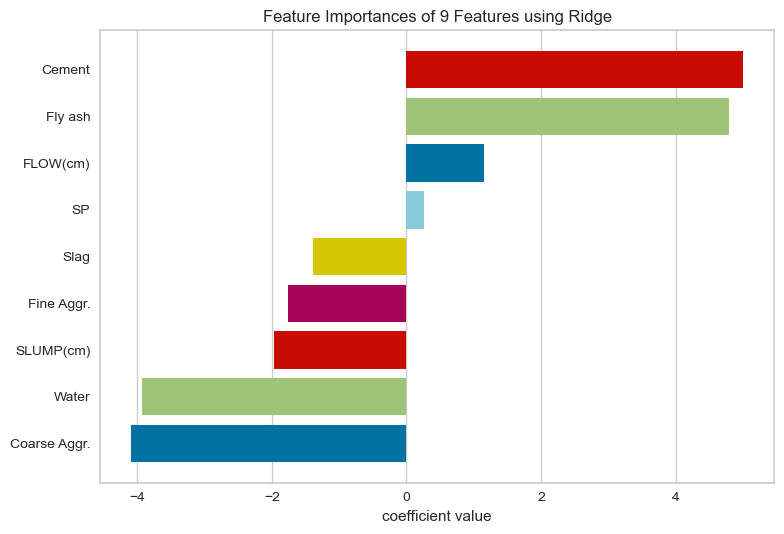

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Ridge'}, xlabel='coefficient value'>

In [360]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=ridge_cv_model.alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()



It gives more or less value to the coefficients of all features. Ridge regression as a technique for analyzing models with multicollinearity

## Feature importances with Lasso

In [167]:
pipe_lassocv["lassocv"].alpha_

0.1

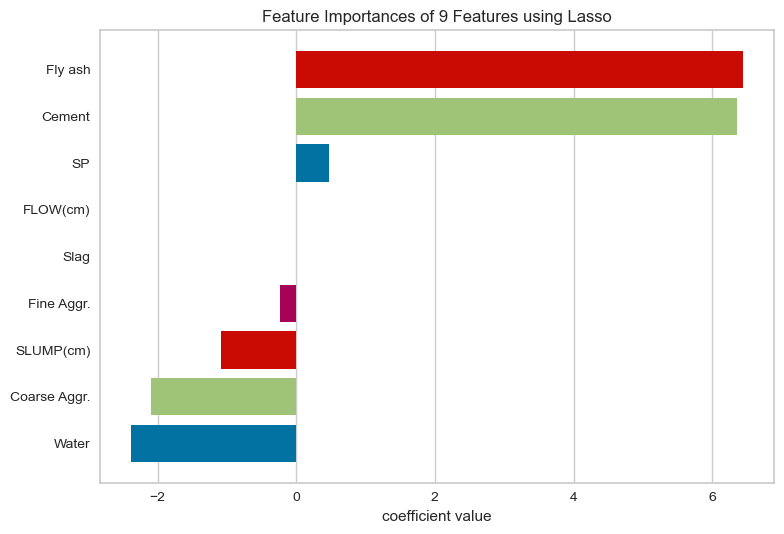

<AxesSubplot:title={'center':'Feature Importances of 9 Features using Lasso'}, xlabel='coefficient value'>

In [361]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=lasso_cv_model.alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

## <span style='color:Blue'> Final Model</span> 

In [362]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(X)

In [363]:
from sklearn.linear_model import Lasso
final_model = Lasso(alpha=0.1)

In [364]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.1)